# Multivariate Visualization

Non-positional encodings for third variables

There are four major cases to consider when we want to plot three variables together:

- three numeric variables
- two numeric variables and one categorical variable
- one numeric variable and two categorical variables
- three categorical variables

If we have at least **`two numeric variables`**, as in the first two cases, one common method for depicting the data is by using a scatterplot to encode two of the numeric variables, then using a non-positional encoding on the points to convey the value on the third variable, whether numeric or categorical.

Three main non-positional encodings stand out: shape, size, and color. For Matplotlib and Seaborn, color is the easiest of these three encodings to apply for a third variable. Color can be used to encode both qualitative and quantitative data, with different types of color palettes used for different use cases. Because of how broadly color can be used, a dedicated discussion of color and its use in Matplotlib and Seaborn will be deferred to the next page in the lesson.

**When the third variable is**
- categorical: **shape**
- quantitative: **size**
- categorical or quantitative: **color**

In addition
- Additional plot practices: facetgrid, pointplot/boxplot/barplot, heatmap
- Plot Matrices

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
fuel_econ = pd.read_csv('data/fuel-econ.csv')

In [12]:
fuel_econ.head(3)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


In [13]:
# VClass categorization
vclass_order = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
fuel_econ['VClass'] = fuel_econ['VClass'].astype(pd.CategoricalDtype(vclass_order))

# quick cleaning on trans
fuel_econ['trans'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [14]:
fuel_econ.VClass.unique()

[Subcompact Cars, Compact Cars, Midsize Cars, Large Cars, Minicompact Cars]
Categories (5, object): [Subcompact Cars, Compact Cars, Midsize Cars, Large Cars, Minicompact Cars]

In [15]:
fuel_econ.trans.unique()

array(['Automatic', 'Manual'], dtype=object)

## `1` Encoding via Shape
Shape is a good encoding for **categorical variables**, using one shape for each level of the categorical variable. 

**Unfortunately**, there is no built-in way to automatically assign different shapes in a single call of the scatter or regplot function. Instead, we need to write a loop to call our plotting function multiple times, isolating data points by categorical level and setting a different "marker" argument value for each one.

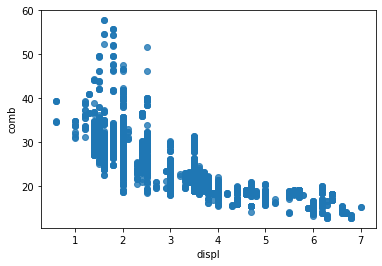

In [7]:
sns.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=False); # try x_jitter=0.4

Adding trans (categorical variable)...

In [8]:
trans_type = list(fuel_econ.trans.unique()) # manual, automatic only
trans_marker = {trans_type[0]: 'o', trans_type[1]: 'x'}

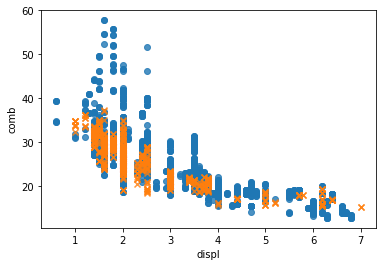

In [9]:
for ttype in trans_type :
    temp_data = fuel_econ[fuel_econ.trans == ttype]
    sns.regplot(data=temp_data, x='displ', y='comb', 
                fit_reg=False, marker=trans_marker[ttype]);

For better visualization, it may be better to reduce data if reasonable. 
<br>`fuel_econ` dataframe has 3929 dataset can it looks quite heavy on graph.

In [10]:
fuel_econ.shape

(3929, 20)

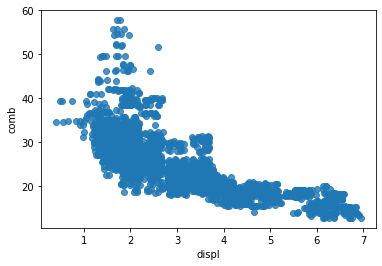

In [11]:
sns.regplot(data=fuel_econ, x='displ', y='comb', fit_reg=False, x_jitter=0.2);

One way that may work is to random sample. Then, repeat the visualiation process as above.

In [12]:
fuelEcon_subset = fuel_econ.sample(200)

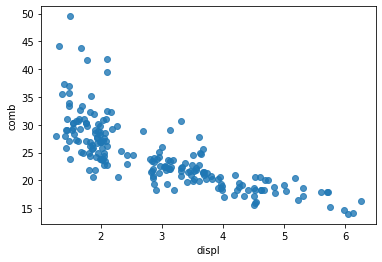

In [13]:
sns.regplot(data=fuelEcon_subset, x='displ', y='comb', fit_reg=False, x_jitter=0.2);

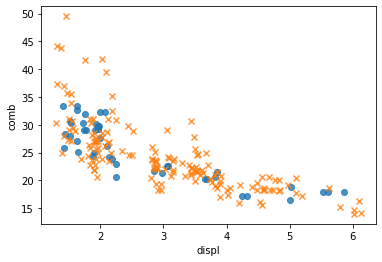

In [14]:
trans_type = list(fuelEcon_subset['trans'].unique())
trans_marker = {trans_type[0]: 'o', trans_type[1]: 'x'}

for ttype in trans_type :
    temp_data = fuelEcon_subset[fuelEcon_subset['trans'] == ttype]
    sns.regplot(data=temp_data, x='displ', y='comb', x_jitter=0.2,
                fit_reg=False, marker= trans_marker[ttype])

In [15]:
fuelEcon_subset['displ'].describe()

count    200.000000
mean       2.942500
std        1.228041
min        1.200000
25%        2.000000
50%        3.000000
75%        3.700000
max        6.200000
Name: displ, dtype: float64

Can use `plt.scatter`

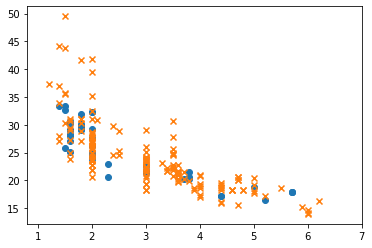

In [16]:
trans_type = list(fuelEcon_subset['trans'].unique())
trans_marker = {trans_type[0]: 'o', trans_type[1]: 'x'}

for ttype in trans_type :
    temp_data = fuelEcon_subset[fuelEcon_subset['trans'] == ttype]
    plt.scatter(data=temp_data, x='displ', y='comb', marker= trans_marker[ttype]);
    plt.xlim((0.8, 7));

## `2` Encoding via Size
Point size is a good encoding for **numeric variables**

Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the "s" parameter in scatter. (You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with regplot.)

In [17]:
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic,Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic,Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


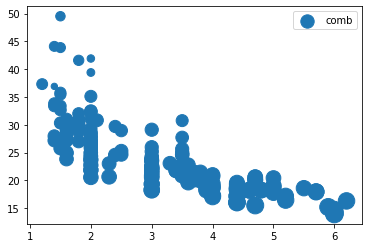

In [18]:
plt.scatter(data=fuelEcon_subset, x='displ', y='comb', 
            s=fuelEcon_subset['co2']/2);  # sample of 400 data and scaled down by half
plt.legend();

While the creation of the plot is easier with size, we need to put in **extra leg work to create a legend**. 

Since, as noted above, legend will only create one legend entry per plot function call, we need to create additional dummy scatter objects with reference sizes to create the plot. The color is fixed so that all of the legend entries have the same color, and two arguments are provided to the legend function: the list of plotting objects to depict in the legend, and their labels.

In [19]:
fuel_econ['co2'].describe()

count    3929.000000
mean      376.564266
std        92.338892
min        29.000000
25%       315.000000
50%       369.000000
75%       429.000000
max       692.000000
Name: co2, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


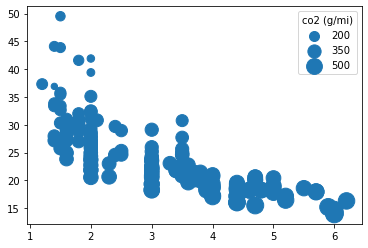

In [20]:
size_group = [200, 350, 500]
base_color = sns.color_palette()[0]
legend_objects = [plt.scatter([],[],s/2, c=base_color) for s in size_group]

plt.scatter(data=fuelEcon_subset, x='displ', y='comb', 
            s=fuelEcon_subset['co2']/2);  # sample of 400 data and scaled down by half
plt.legend(legend_objects, size_group, title='co2 (g/mi)');

#### Still, the above graph with Matplotlib's scatter does not look informationl enough
Let's try with `regplot`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


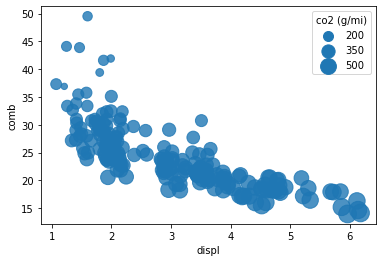

In [21]:
size_group = [200, 350, 500]
base_color = sns.color_palette()[0]
legend_objects = [plt.scatter([], [], s=s/2, c=base_color) for s in size_group]

sns.regplot(data=fuelEcon_subset, x='displ', y='comb', x_jitter=0.2, fit_reg=False,
            scatter_kws = {'s': fuelEcon_subset['co2'] / 2})
plt.legend(legend_objects, size_group, title='co2 (g/mi)');

### `Tips` A Warning on Combining Encodings
It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once. Technically, this may be true, but there are some cautions to be taken with this approach. One surface issue is that the code to depict the plot and a reasonable legend gets complicated. A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker:

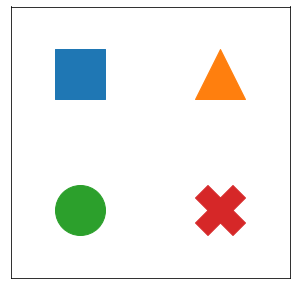

In [27]:
plt.figure(figsize = [5,5])

common_size = 2500
plt.scatter([0],[1], marker = 's', s = common_size)
plt.scatter([1],[1], marker = '^', s = common_size)
plt.scatter([0],[0], marker = 'o', s = common_size)
plt.scatter([1],[0], marker = 'X', s = common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5,1.5)
plt.xticks([])
plt.ylim(-0.5,1.5)
plt.yticks([]);

Despite having the same "s" values, the triangle, circle, and X markers all look smaller (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider. A little more discussion of the number of variables that can be reasonably packed into a plot can be found later in the lesson ("How much is too much?").

Bloomberg: Tracking Super Bowl Ticket Prices - [This visualization]((https://www.bloomberg.com/graphics/infographics/tracking-super-bowl-ticket-prices.html)) shows an interesting encoding for a third variable: connecting points by a line to show the changes in the two axis values across time. A different marker at each end of the path shows the starting point and the end point.

---

## `3`. Encoding via Color
Color is a very common encoding for variables, for both qualitative and quantitative variables. You've already seen this employed in previous lessons where position could not be used to encode a value: color for category in a clustered bar chart, and color for count in a heat map (both as a 2-d histogram and as a 2-d bar chart). Here, we'll look at how to employ color in scatterplots, as well as discuss more about color palette choices depending on the type of data you have.

#### If you have a `qualitative variable`, 

you can set different colors for different levels of a categorical variable through the `hue` parameter on seaborn's `FacetGrid` class.

In [33]:
# randomly choose 400 samples from the original dataset
fuelEcon_subset = fuel_econ.sample(400)

In [36]:
sns.regplot(data=fuelEcon_subset, x='displ', y='comb', fit_reg=False,
            hue:fuelEcon_subset['trans']);

NameError: name 'hue' is not defined

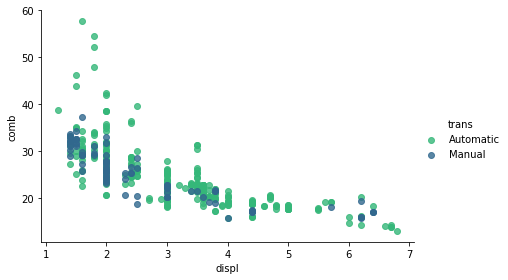

In [62]:
g = sns.FacetGrid(data=fuelEcon_subset, hue='trans', height=4, aspect=1.5, palette='viridis_r')
g.map(sns.regplot, 'displ', 'comb', fit_reg=False);
g.add_legend();

#### For `quantitative variables`, 

we should not take the same approach, since FacetGrid expects any variable input for subsetting to be categorical. 

Instead, we can set color based on numeric value in the `scatter` function through the "c" parameter, much like how we set up marker sizes through "s". (Unlike with size, we don't have an easy way of setting color by numeric value through regplot due to how its "color" argument is set up.)

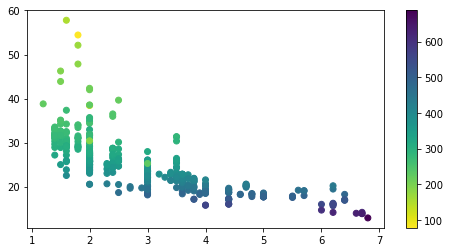

In [61]:
plt.figure(figsize=(8,4))
plt.scatter(data=fuelEcon_subset, x='displ', y='comb', c='co2', cmap='viridis_r'); #numerical
plt.colorbar();

### `Tips` Color Palette
Depending on the type of data you have, you may want to change the type of color palette that you use to depict your data. There are three major classes of color palette to consider: **`qualitative`**, **``sequential``**, and **`diverging`**.

#### Qualitative palettes are built for nominal-type data. 
This is the palette class taken by the default palette.

In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied. Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

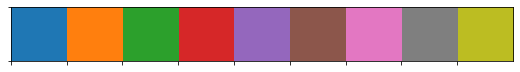

In [23]:
sns.palplot(sns.color_palette(n_colors=9))

#### For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale. 

**In a sequential palette,** consecutive color values should follow each other systematically. Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values. 

The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

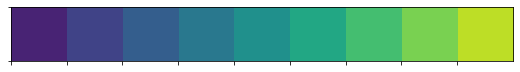

In [24]:
sns.palplot(sns.color_palette('viridis', 9))

Most of the time, a sequential palette will depict ordinal or numeric data just fine. However, if there is **a meaningful zero or center value** for the variable, you may want to consider using a diverging palette. 

**In a diverging palette,** two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them. One hue indicates values greater than the center point, while the other indicates values smaller than the center.

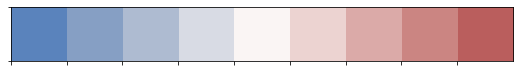

In [25]:
sns.palplot(sns.color_palette('vlag', 9))

### `Tips` Selecting Color Palettes
If you want to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from Matplotlib or Seaborn. [This part](https://matplotlib.org/api/pyplot_summary.html#colors-in-matplotlib) of the Matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes noted in the top few tables as built-in for Matplotlib ('viridis', etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:

- Qualitative (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
- Sequential: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
- Diverging: 'vlag' (blue-white-red), 'icefire' (blue-black-orange)

For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

A color palette can be set in FacetGrid through the "palette" parameter, and in scatter through the "cmap" parameter.




For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.

A color palette can be set in FacetGrid through the **`"palette" parameter`**, and in scatter through the "cmap" parameter.

In [16]:
fuel_econ.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic,Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic,Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


In [25]:
fuelEcon_subset = fuel_econ.sample(400)

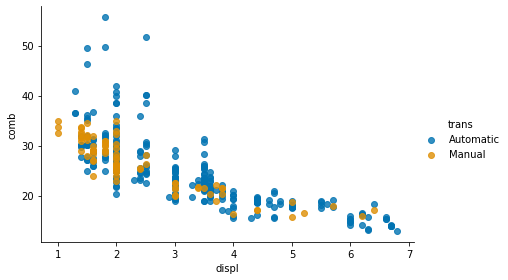

In [26]:
# qualitative palette, third variable -> trans 
g = sns.FacetGrid(data=fuelEcon_subset, height=4, aspect=1.5, hue='trans',
                  palette='colorblind');
g.map(sns.regplot, 'displ', 'comb', fit_reg=False);
g.add_legend();

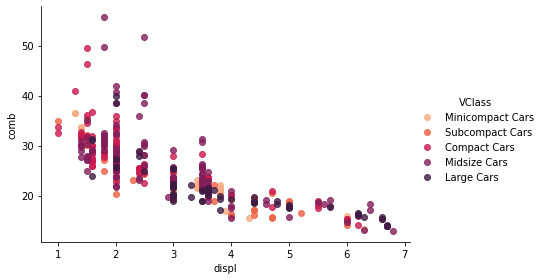

In [28]:
# sequential palette, third variable -> VClass
g = sns.FacetGrid(data=fuelEcon_subset, height=4, aspect=1.5, hue='VClass',
                  palette='rocket_r')
g.map(sns.regplot, 'displ', 'comb', fit_reg=False)
g.add_legend();

In [39]:
fuelEcon_subset['co2'].describe()

count    400.000000
mean     379.462500
std       98.099068
min      112.000000
25%      309.750000
50%      363.000000
75%      438.000000
max      688.000000
Name: co2, dtype: float64

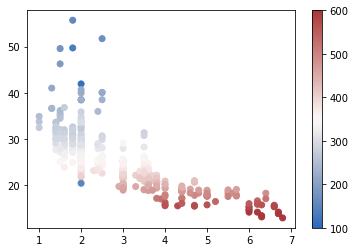

In [40]:
# diverging palette, third variable -> co2
plt.scatter(data=fuelEcon_subset, x='displ', y='comb', c='co2', cmap='vlag',
            vmin=100, vmax=600)
plt.colorbar();

When using a diverging color palette, you will likely need to specify the **"vmin" and "vmax" parameters** in order to have the neutral point in the palette meet the center point in the scale. 

Alternatively, solutions that create a different normalization function like the one posted in [this Stack Overflow thread](https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib) can be used for finer control over the color map. Diverging color scales are common enough for the heatmap type that there is a "center" parameter for setting the central value. You'll see a demonstration of this later in the lesson ("Plot Matrices").

### `Tips` Warnings on Color
There are a couple of things to be aware of in general, when working with color. First of all, try and consider color blindness when selecting color for your plots. You don't want your visualization to shut out the 8% of the population that have some kind of color vision deficiency. Fortunately, the built-in color palettes highlighted in the previous section should minimize these concerns. If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness sim like this one.

Secondly, you want to be aware of the effect of transparency and overlap on interpretability. If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette. If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data. To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

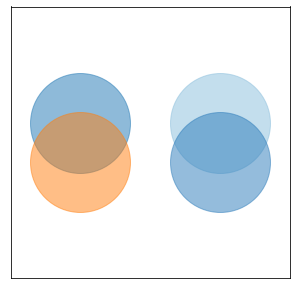

In [41]:
plt.figure(figsize = [5,5])

# left: qualitative points
plt.scatter(0,0.5,s = 1e4, c = sns.color_palette()[0], alpha = 0.5)
plt.scatter(0,-0.5,s = 1e4, c = sns.color_palette()[1], alpha = 0.5)

# right: quantitative points
plt.scatter(1,0.5,s = 1e4, c = sns.color_palette('Blues')[2], alpha = 0.5)
plt.scatter(1,-0.5,s = 1e4, c = sns.color_palette('Blues')[4], alpha = 0.5)

# set axes for point overlap
plt.xlim(-0.5,1.5)
plt.ylim(-3.5,3.5)
plt.xticks([])
plt.yticks([]);

### Further Reading
- Matplotlib tutorial: [Colormaps in Matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html)
- Seaborn tutorial: [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
- Eager Eyes: [How The Rainbow Color Map Misleads](https://eagereyes.org/basics/rainbow-color-map) - seaborn will refuse to accept the 'jet' palette string, which corresponds with a rainbow-colored palette that covers the entire range of hues. This, and the next link, will tell you why it's been forbidden.
- Agile Scientific: [No more rainbows!](https://agilescientific.com/blog/2017/12/14/no-more-rainbows)
- Datawrapper: [How to Choose a Color Palette for Choropleth Maps](https://blog.datawrapper.de/how-to-choose-a-color-palette-for-choropleth-maps/) - Though this article discusses color in the context of maps and for a specific software tool, it's a useful reference if you want to create a non-linear normalization function.